In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset
data = pd.read_csv("cardio_train.csv", sep = ';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#**1. Exploratory Data Analysis (EDA)**

#Goal :
Understand our data in order to define a modeling strategy


#Checklist :

*    **Prerequisits and early analysis** 

*Target*: cardio

*Shape* : 70000, 13

*Types of features* :  quantitatives : 13


*   **Detailed analysis and data visualisation** 

*Visualization of the target* : 50% - positifs, 50% - negative (34979 / 35021)


*Visualization and understanding of features*


*    **Deep dive analysis**

*Relationship features / target*

*Relationship features / features*

*Identification of outliers*



# Prerequisits and early analysis

In [ ]:
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Basic stats
df.describe(include="all")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      12
float64     1
dtype: int64

In [ ]:
# Check if duplicates
df.drop_duplicates(inplace=True)
len(df)

70000

In [ ]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

#Detailed analysis and data visualisation

In [ ]:
df = df.drop(['id'],axis=1)

In [ ]:
# Convert feature "age" to year
df['age'] = (df['age']/365).round()

In [ ]:
positive_df = df[df['cardio'] == 1]

In [ ]:
negative_df = df[df['cardio'] == 0]

In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
quanti_columns = df.drop(['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'cardio'], axis=1)
quanti_columns

,age,height,weight,ap_hi,ap_lo
0,50.0,168,62.0,110,80
1,55.0,156,85.0,140,90
2,52.0,165,64.0,130,70
3,48.0,169,82.0,150,100
4,48.0,156,56.0,100,60
...,...,...,...,...,...
69995,53.0,168,76.0,120,80
69996,62.0,158,126.0,140,90
69997,52.0,183,105.0,180,90
69998,61.0,163,72.0,135,80


In [ ]:
quali_columns = df.drop(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio'], axis=1)
quali_columns

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0
...,...,...,...,...,...,...
69995,2,1,1,1,0,1
69996,1,2,2,0,0,1
69997,2,3,1,0,1,0
69998,1,1,2,0,0,0


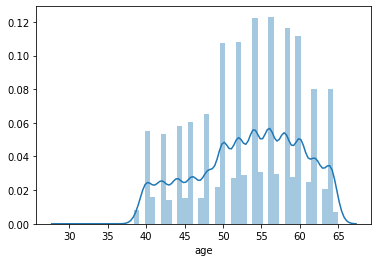

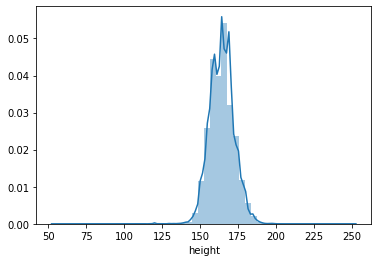

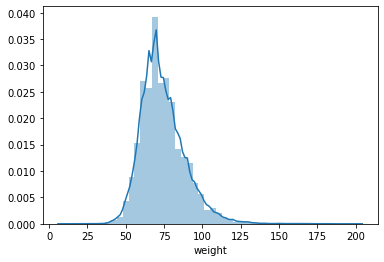

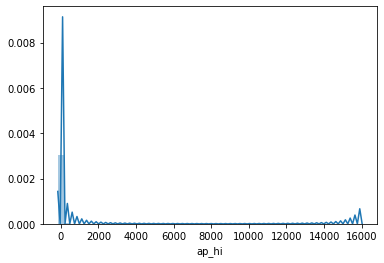

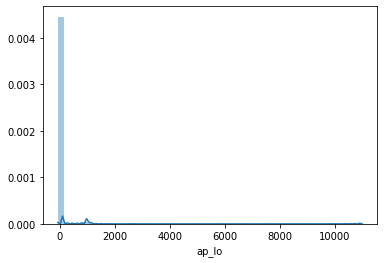

In [ ]:
for col in quanti_columns:
    plt.figure()
    sns.distplot(df[col])

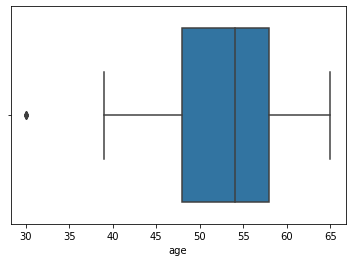

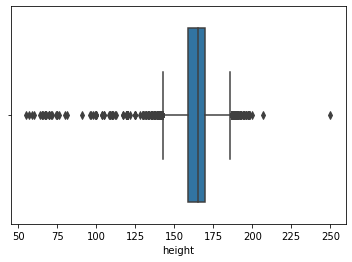

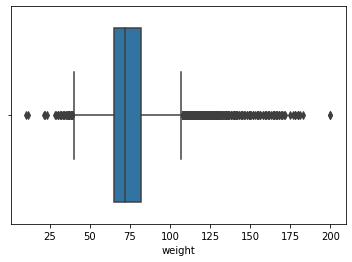

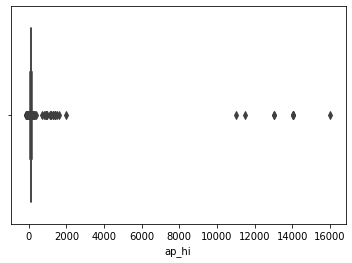

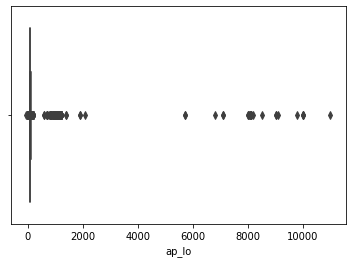

In [ ]:
for col in quanti_columns:
    plt.figure()
    sns.boxplot(df[col])

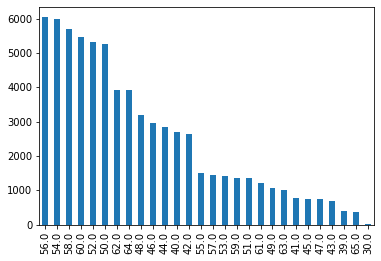

In [ ]:
df['age'].value_counts().plot.bar()

In [ ]:
for col in quali_columns:
    print(f'{col :-<50} {df[col].unique()}')

gender-------------------------------------------- [2 1]
cholesterol--------------------------------------- [1 3 2]
gluc---------------------------------------------- [1 2 3]
smoke--------------------------------------------- [0 1]
alco---------------------------------------------- [0 1]
active-------------------------------------------- [1 0]


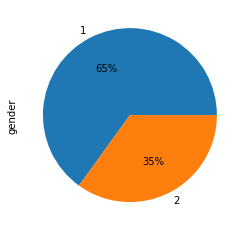

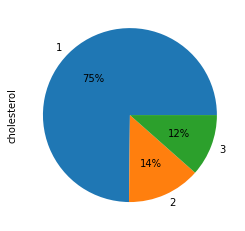

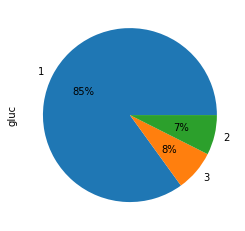

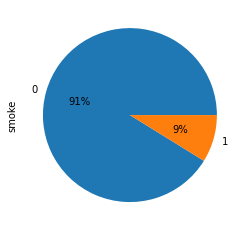

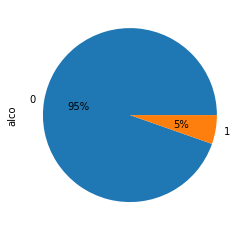

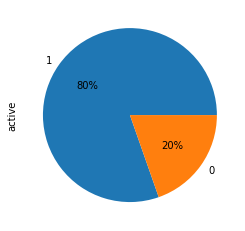

In [ ]:
 for col in quali_columns:
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%1.0f%%")

# Deep dive analysis
## Relationship categorical features / target

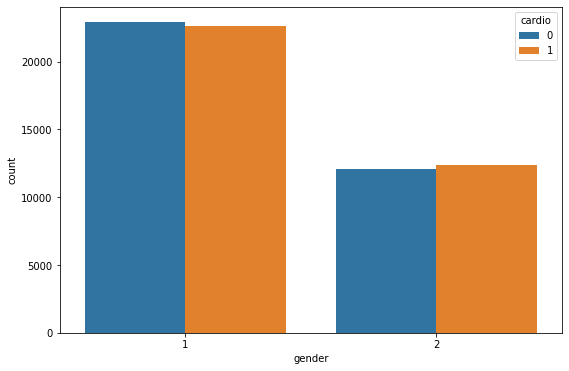

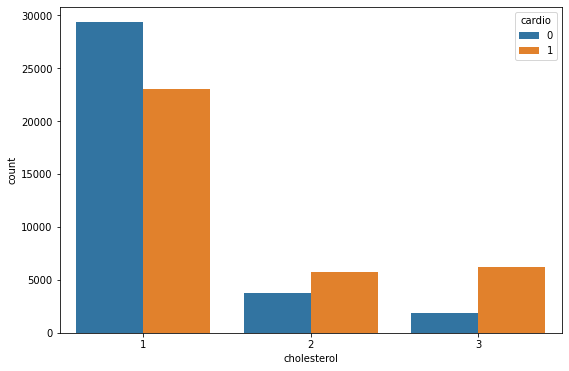

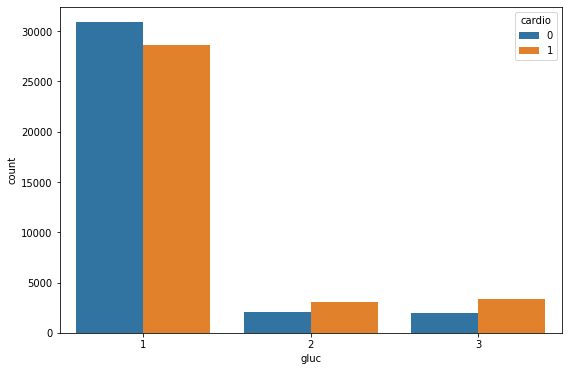

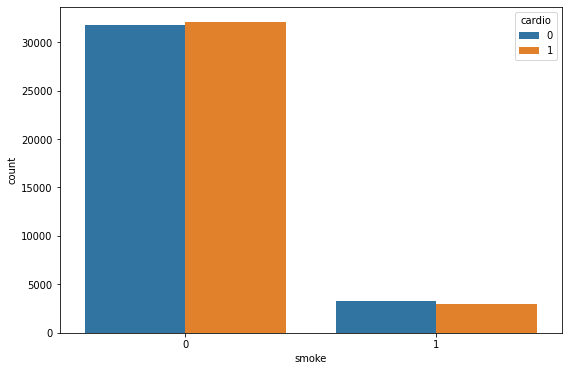

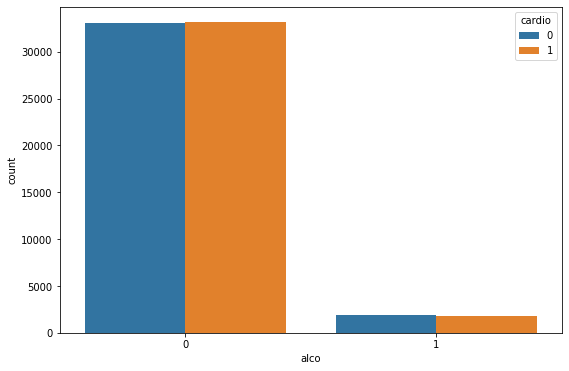

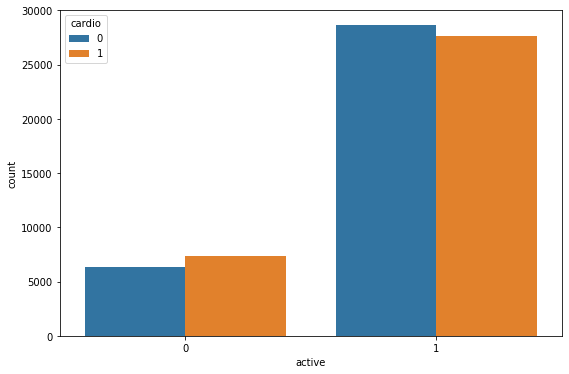

In [ ]:
for col in quali_columns:
  plt.figure(figsize=(9,6))
  sns.countplot(x=col, hue='cardio', data=df)

## Relationship age / target

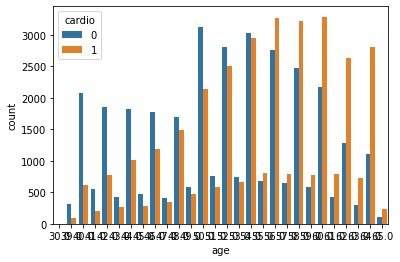

In [ ]:
sns.countplot(x='age', hue='cardio', data=df)

<Figure size 432x288 with 0 Axes>

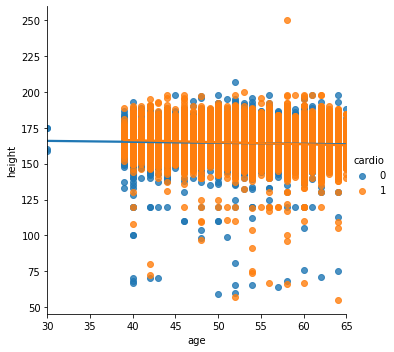

<Figure size 432x288 with 0 Axes>

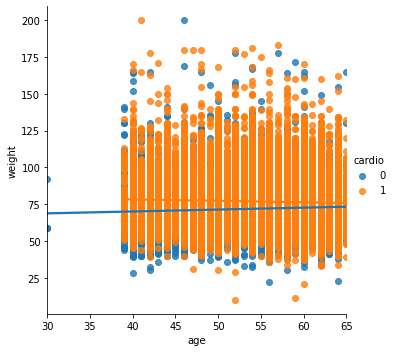

<Figure size 432x288 with 0 Axes>

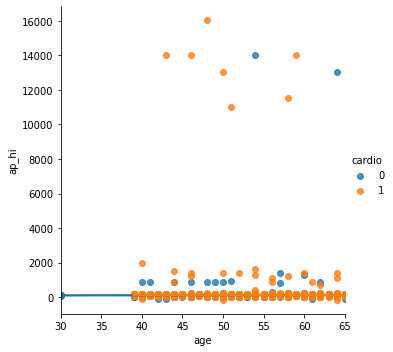

<Figure size 432x288 with 0 Axes>

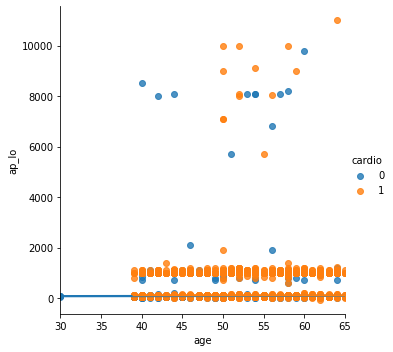

In [ ]:
for col in quanti_columns.iloc[:,1:5]:
    plt.figure()
    sns.lmplot(x='age', y=col, hue='cardio', data=df)

## Relationship numerical features / target

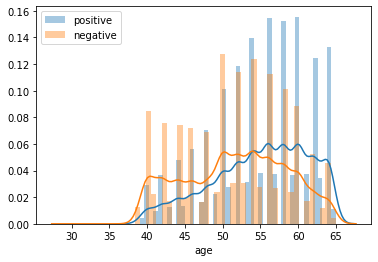

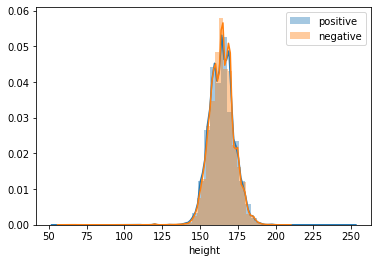

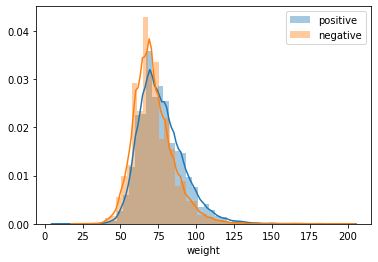

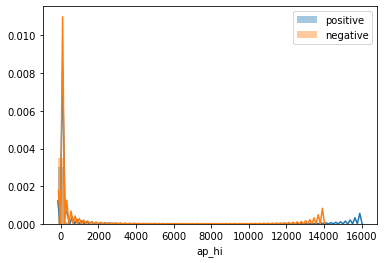

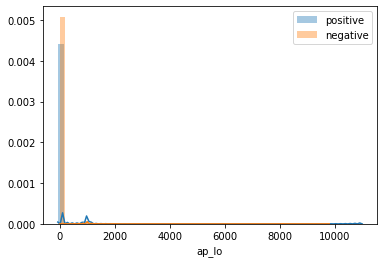

In [ ]:
for col in quanti_columns:
  plt.figure()
  sns.distplot(positive_df[col], label = "positive")
  sns.distplot(negative_df[col], label = "negative")
  plt.legend()

## Relationship features / features

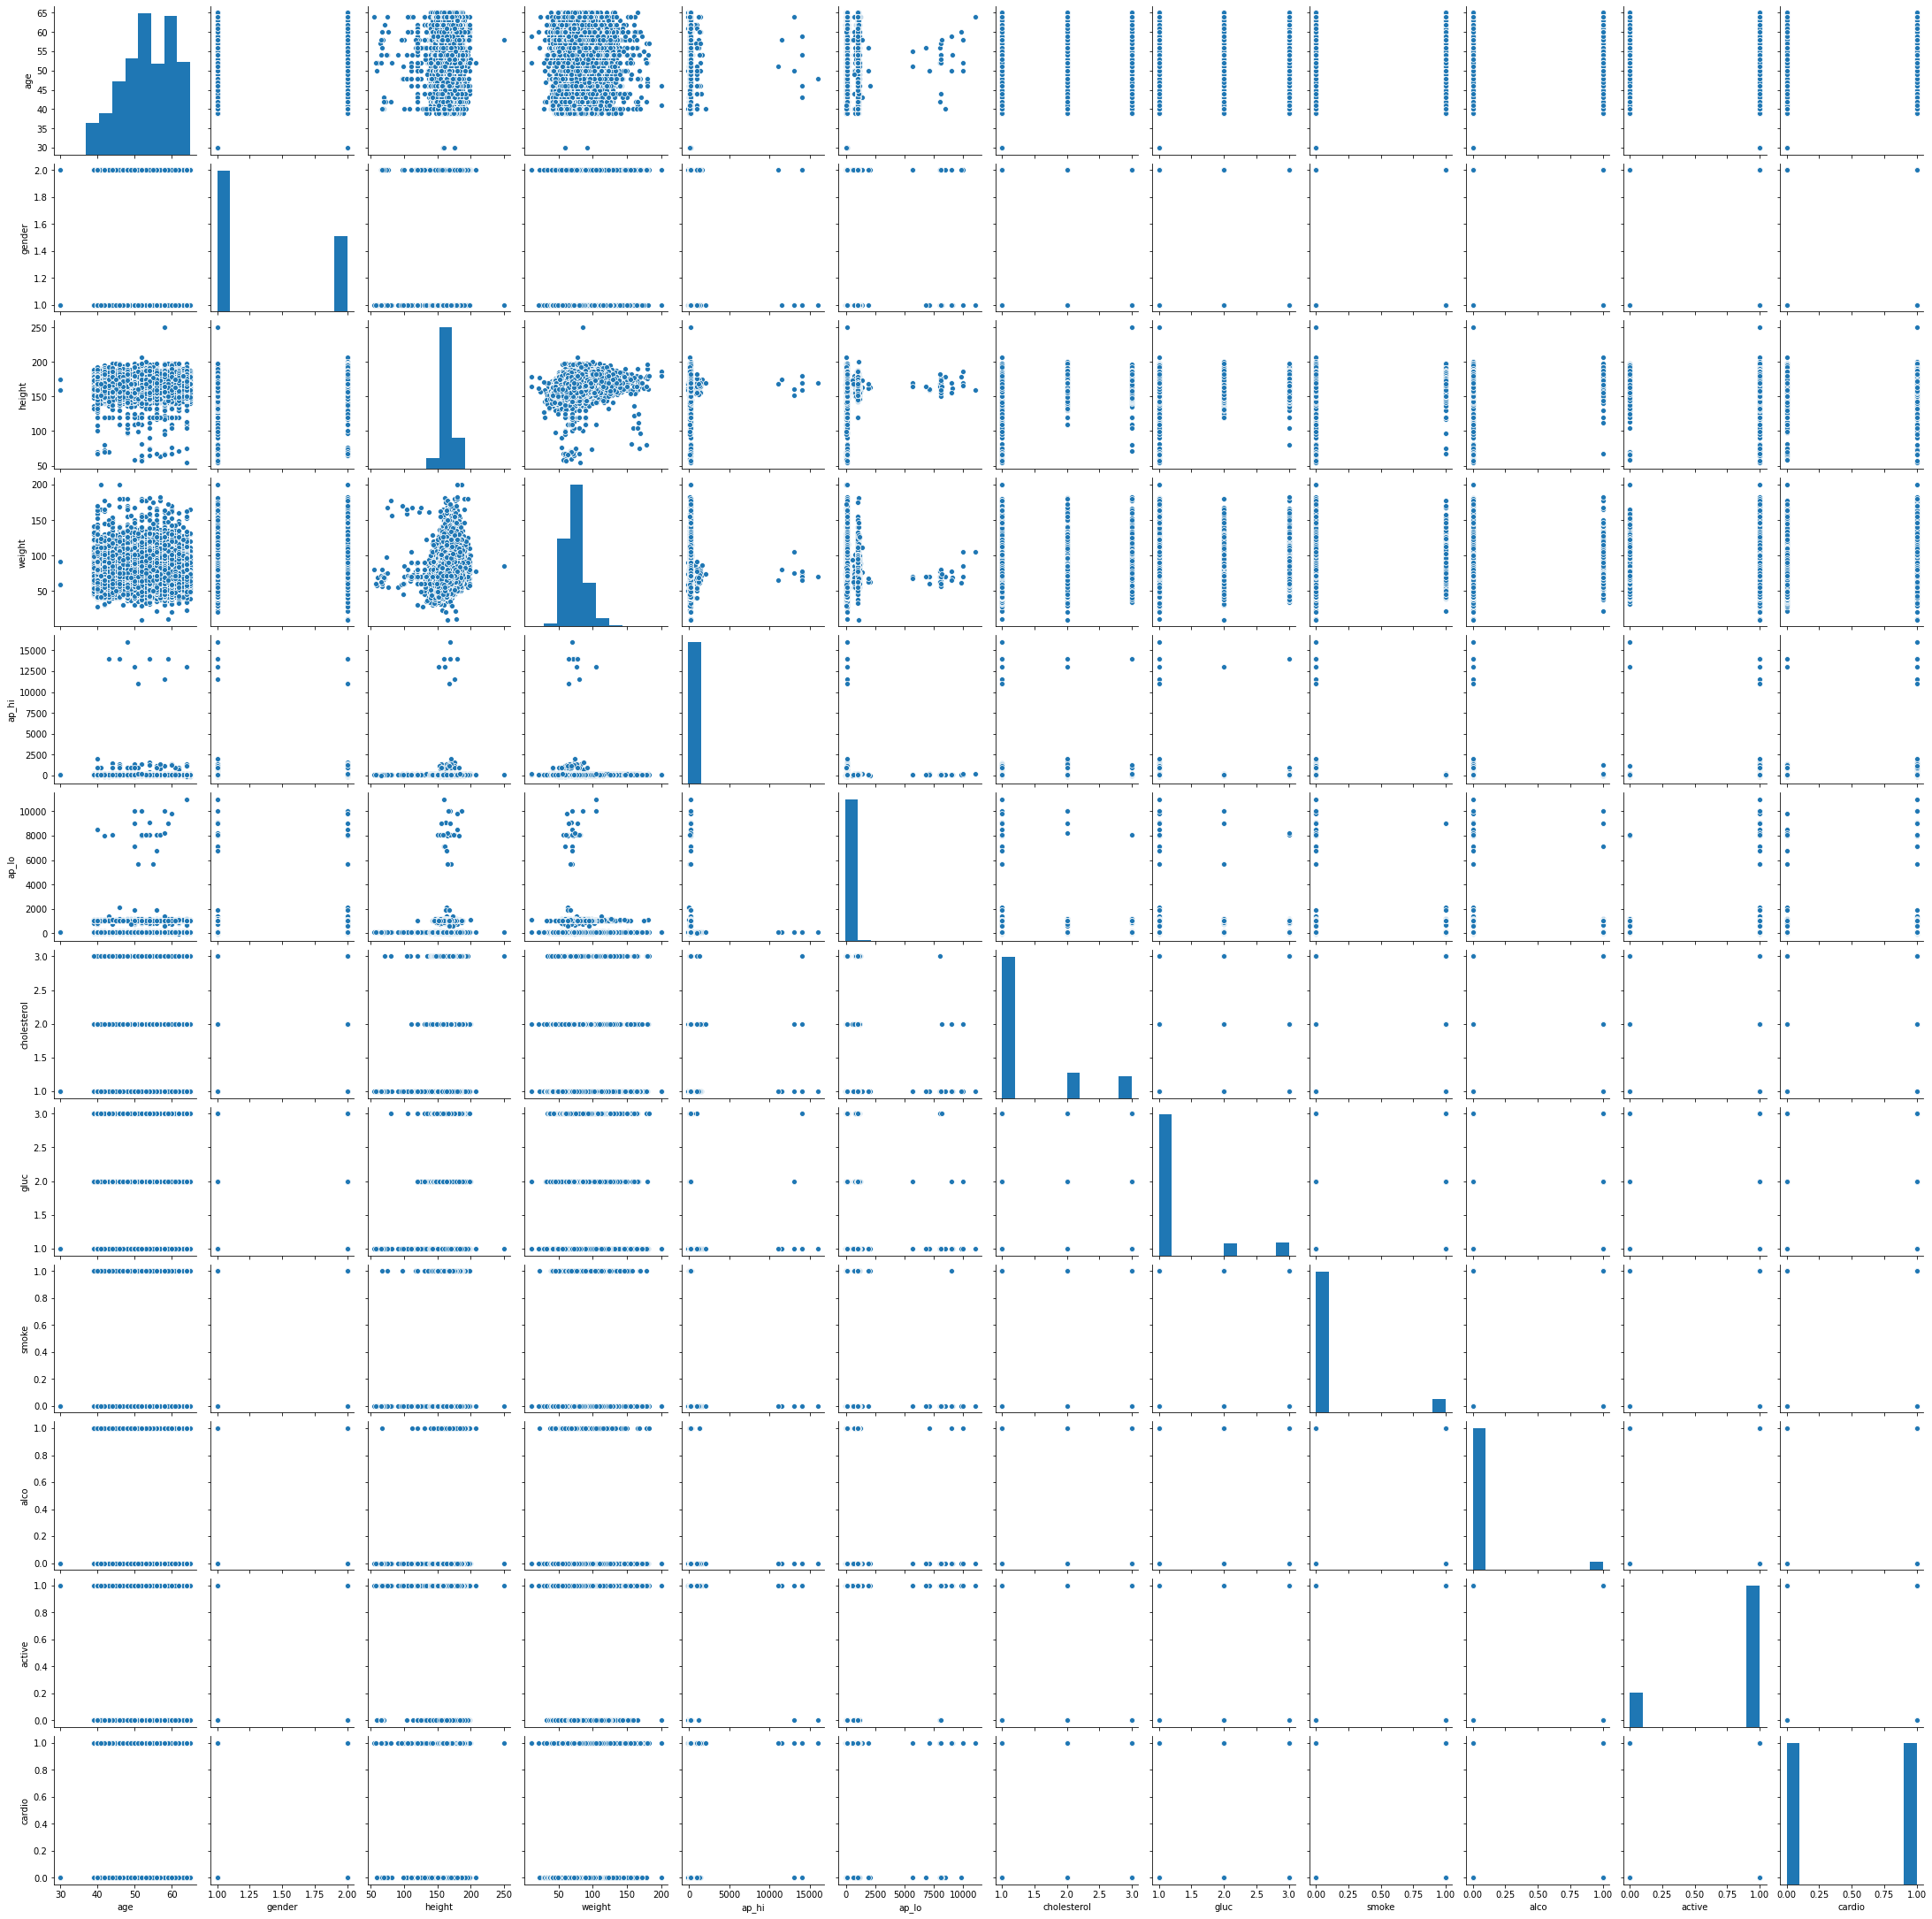

In [ ]:
# Visualise the relationship features / features
sns.pairplot(df)

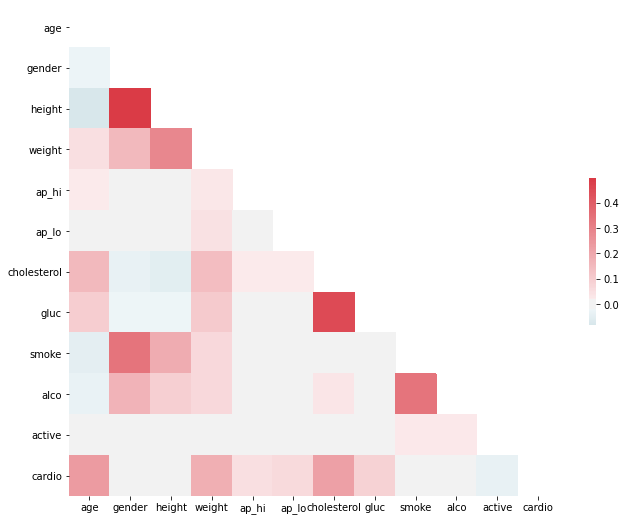

In [ ]:
# Check correlations
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = cmap, square=True,  
            center=0, cbar_kws={"shrink": .3})

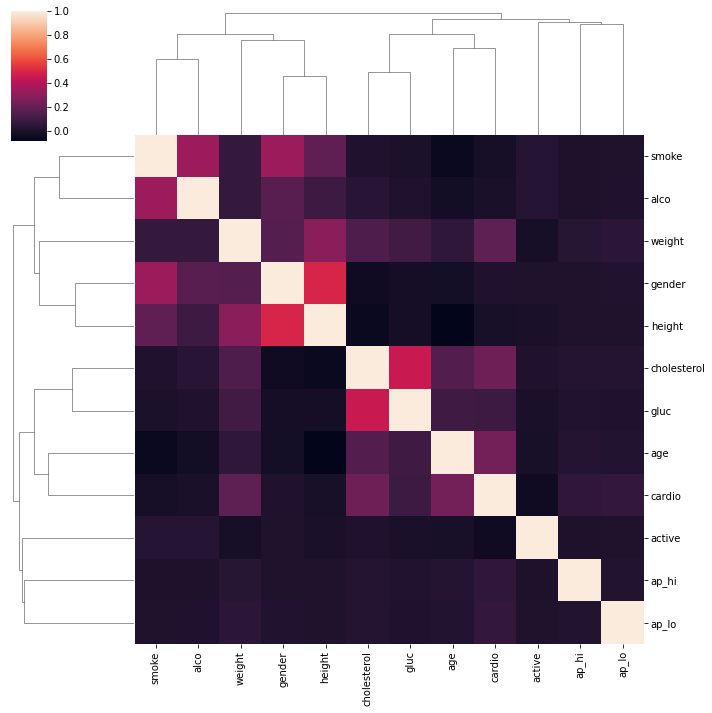

In [ ]:
# Visualize the correlation with a clustermap
sns.clustermap(df.corr())


## Identification of outliers

In [ ]:
for col in quanti_columns:
  q_low_col = df[col].quantile(0.01)
  outliers_low_col = (df[col] < q_low_col)
  df = df[~outliers_low_col]
  q_hi_col = df[col].quantile(0.99)
  outliers_hi_col = (df[col] > q_hi_col)
  df = df[~outliers_hi_col] 


In [ ]:
df.describe(include="all")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000,65807.000000
mean,53.372377,1.348261,164.457930,73.848726,126.653107,90.017688,1.363639,1.224763,0.087407,0.052928,0.804383,0.497485
std,6.647443,0.476423,7.311494,12.908124,16.027639,89.074338,0.678651,0.571067,0.282433,0.223890,0.396678,0.499997
min,40.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


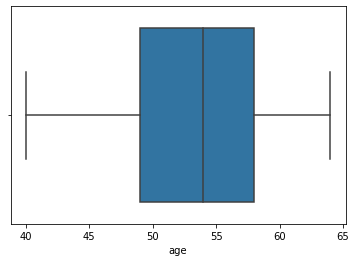

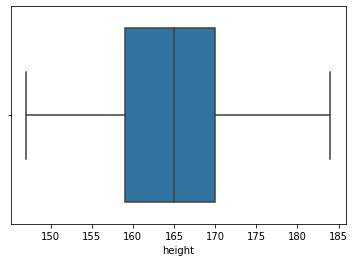

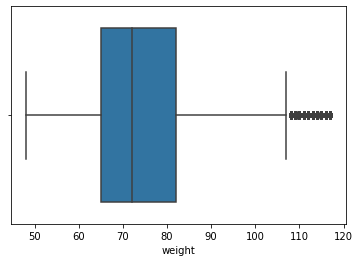

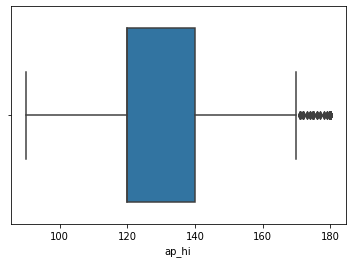

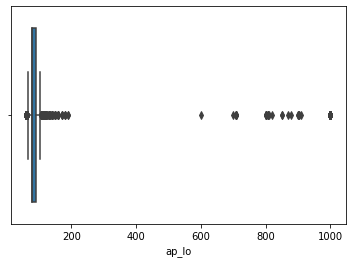

In [ ]:
# Visualize if other outliers 
for col in quanti_columns:
    plt.figure()
    sns.boxplot(df[col])

In [ ]:
# drop ouliers in "ap_lo"
df= df.query("ap_lo<105 & ap_lo>65")

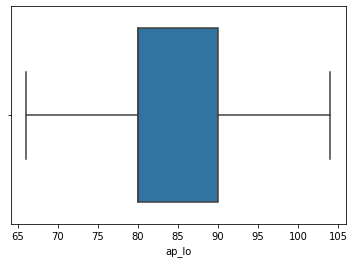

In [ ]:
sns.boxplot(df["ap_lo"])

In [ ]:
df.describe(include="all")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62088.00000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000,62088.000000
mean,53.45231,1.351243,164.533147,74.003512,127.025287,81.907631,1.364531,1.225744,0.087344,0.052699,0.803972,0.501208
std,6.62918,0.477363,7.297537,12.833006,14.971205,7.744188,0.680610,0.572930,0.282340,0.223434,0.396993,0.500003
min,40.00000,1.000000,147.000000,48.000000,90.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.00000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.00000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.00000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.00000,2.000000,184.000000,117.000000,180.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#**2. Preprocessing**

#Goal :
Transform data in order to facilitate machine Learning and avoid overfitting


#Checklist :

*    **Divide dataset into trainset, testset** 

*    **Analyse of NaNs : Drop or fill out NaNs** 
*None : 70 000 patients for all columns

*    **Encoding** 
*Features encoding : None - not categorical features => types : *int and float*
*Label encoding : None - not categorical target

*    **Normalisation** 
*Normalisation of quantitative features :

*    **Drop outliers** 
*Already done in EDA 

*    **Feature engineering** 
*Not mandatory

*    **Feature scaling** 
*Not mandatory



# Create trainset, testset


In [ ]:
# Separate target variable Y from features X
X = df.drop("cardio", axis=1)
y = df["cardio"]

In [ ]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
5,60.0,1,151,67.0,120,80,2,2,0,0,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

In [ ]:
#numeric_features = [X.columns["gender", "cholesterol",	"gluc",	"smoke", "alco",	"active"]]
#numeric_features


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(y_train[0:5])
print(y_test[0:2])

[[ 46.   1. 163.  68. 120.  80.   1.   1.   0.   0.   1.]
 [ 54.   1. 178.  74. 150. 100.   1.   1.   0.   0.   1.]
 [ 42.   1. 160.  60. 120.  80.   1.   1.   0.   0.   0.]
 [ 61.   1. 158.  94. 140.  90.   1.   1.   0.   0.   1.]
 [ 60.   2. 170.  73. 120.  80.   1.   1.   0.   0.   0.]]
[[ 60.   1. 159.  58. 120.  80.   2.   3.   0.   0.   0.]
 [ 61.   2. 167.  84. 150.  90.   1.   2.   0.   0.   1.]]

[0 1 0 1 1]
[1 0]


# Normalisation

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_train[0:5,:])

[[-1.12587736 -0.73345849 -0.20816382 -0.47065804 -0.47245401 -0.25276799
  -0.53411709 -0.39500178 -0.30793594 -0.23435681  0.49423643]
 [ 0.08065188 -0.73345849  1.84617692 -0.00304396  1.52894958  2.32769532
  -0.53411709 -0.39500178 -0.30793594 -0.23435681  0.49423643]
 [-1.72914198 -0.73345849 -0.61903197 -1.09414348 -0.47245401 -0.25276799
  -0.53411709 -0.39500178 -0.30793594 -0.23435681 -2.02332314]
 [ 1.13636496 -0.73345849 -0.89294407  1.55566963  0.86181505  1.03746366
  -0.53411709 -0.39500178 -0.30793594 -0.23435681  0.49423643]
 [ 0.9855488   1.36340367  0.75052853 -0.08097964 -0.47245401 -0.25276799
  -0.53411709 -0.39500178 -0.30793594 -0.23435681 -2.02332314]]


In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
#pf_x = PolynomialFeatures(2)
#X_train = pf_x.fit_transform(X_train)
#X_test = pf_x.transform(X_test)
#print(X_train[0:5,:])

# Feature selection

In [ ]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance

(array([2.71753553e+03, 4.98756667e-02, 1.26193532e+01, 3.79605784e+03,
        2.01308222e+04, 5.25666810e+03, 1.00433874e+03, 1.20807275e+02,
        2.18341469e+01, 5.98212037e+00, 1.62124580e+01]),
 array([0.00000000e+000, 8.23279764e-001, 3.81773402e-004, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.04730115e-220, 4.21117888e-028,
        2.97262470e-006, 1.44516177e-002, 5.66205379e-005]))

In [ ]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
ap_hi,20130.822236,0.000000e+00
ap_lo,5256.668096,0.000000e+00
weight,3796.057842,0.000000e+00
age,2717.535532,0.000000e+00
cholesterol,1004.338742,2.047301e-220
gluc,120.807275,4.211179e-28
smoke,21.834147,2.972625e-06
active,16.212458,5.662054e-05
height,12.619353,3.817734e-04
alco,5.982120,1.445162e-02


#**3. Modelling**

#Goal :
Implement a ML algorithm to get a training score at least greater than 70%


#Checklist :

*    **Training : 1st model** 
> Logitic Regression

*    **Training : other models** 

> Random Forest
> Gradient Boosting Classifier
> SVM
> KNN

*    **Optimisation with GridSearch / RandomizedSearch** 

*    **Errors analysis and return to preprocessing / EDA** 

*    **Learning curve and decision-making** 




# Training : 1st model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prediction on the train set
y_train_pred = logistic.predict(X_train)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Prediction on the test set
y_test_pred = logistic.predict(X_test)
y_test_pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
# Print the accuracy scores
from sklearn.metrics import accuracy_score
print("Accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))

Accuracy on train set :  0.722528689349708
Accuracy on test set :  0.7266870671605734


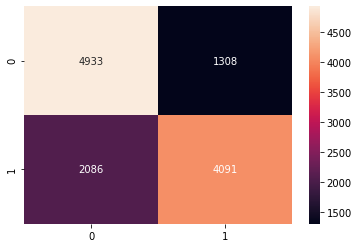

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
_=sns.heatmap(cm, annot=True, fmt="d")

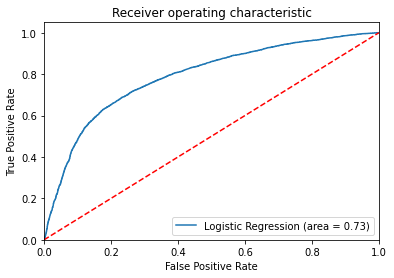

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Training : other models



In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
   
   
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=3, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
RandomForest = RandomForestClassifier(random_state=0)
GBC = GradientBoostingClassifier(random_state=0)
SVM = SVC(random_state=0)
KNN = KNeighborsClassifier()

In [ ]:

dict_of_models = {'RandomForest': RandomForest,
                  'GBC': GBC,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[4454 1787]
 [1898 4279]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6241
           1       0.71      0.69      0.70      6177

    accuracy                           0.70     12418
   macro avg       0.70      0.70      0.70     12418
weighted avg       0.70      0.70      0.70     12418

GBC
[[4827 1414]
 [1871 4306]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6241
           1       0.75      0.70      0.72      6177

    accuracy                           0.74     12418
   macro avg       0.74      0.74      0.73     12418
weighted avg       0.74      0.74      0.74     12418

SVM
[[4969 1272]
 [2046 4131]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6241
           1       0.76      0.67      0.71      6177

    accuracy                           0.73     12418
   macro avg       0.74   

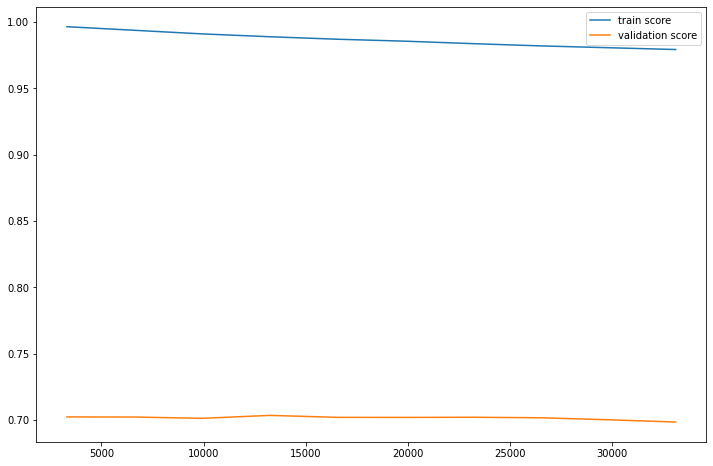

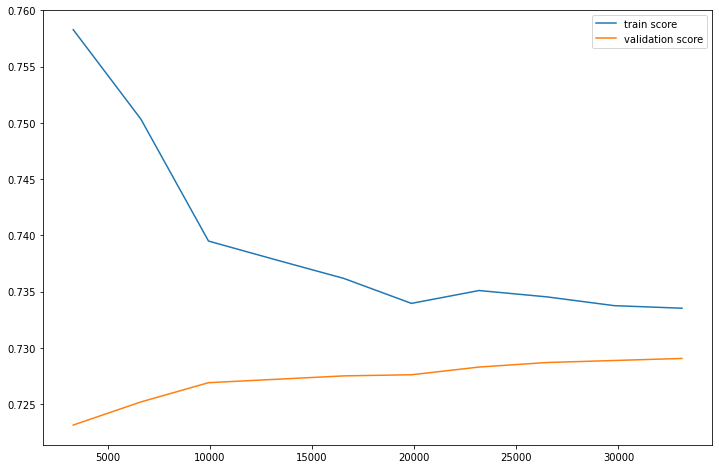

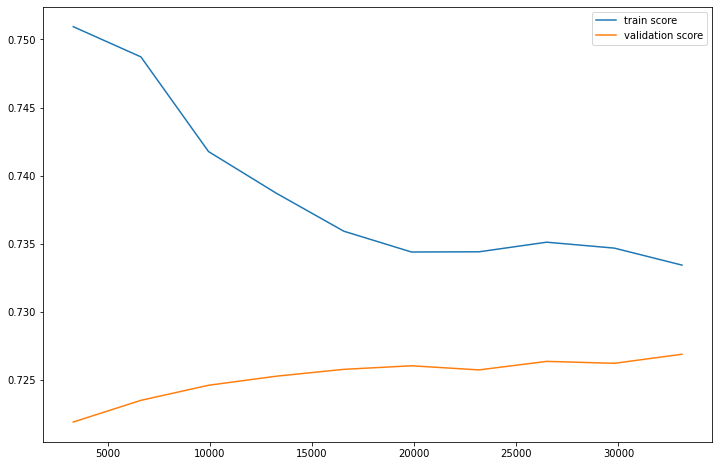

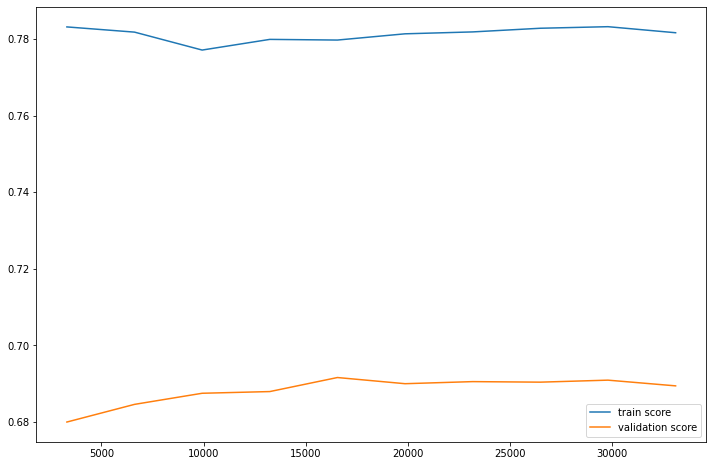

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

# Optimisation with GridSearch / RandomizedSearch

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
hyper_params = {'loss' : ["deviance"],
              'n_estimators' : [100,300,500,800],
              'learning_rate' : [0.03,0.2, 0.5],
              'max_depth': [2, 4]}

In [ ]:
grid = RandomizedSearchCV(GBC, hyper_params, scoring='accuracy', cv=3,
                          n_iter=40, verbose = 1)

grid.fit(X_train, y_train)

print(grid.best_params_)


y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=40. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 12.8min finished


{'n_estimators': 300, 'max_depth': 4, 'loss': 'deviance', 'learning_rate': 0.03}
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6241
           1       0.76      0.70      0.73      6177

    accuracy                           0.74     12418
   macro avg       0.74      0.74      0.74     12418
weighted avg       0.74      0.74      0.74     12418



[[4850 1391]
 [1872 4305]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6241
           1       0.76      0.70      0.73      6177

    accuracy                           0.74     12418
   macro avg       0.74      0.74      0.74     12418
weighted avg       0.74      0.74      0.74     12418



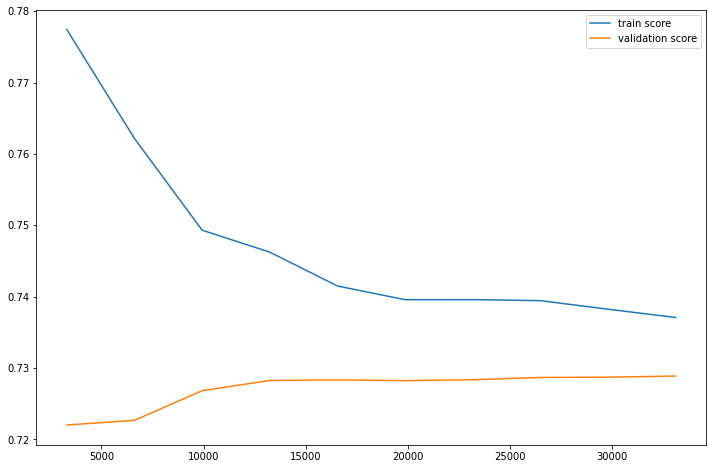

In [ ]:
evaluation(grid.best_estimator_)

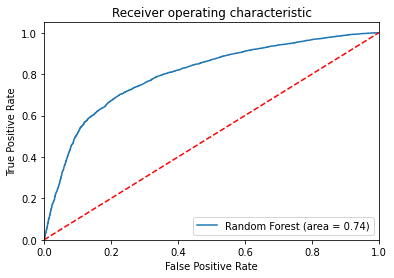

In [ ]:
# The AUC ROC score
logit_roc_auc = roc_auc_score(y_test, grid.best_estimator_.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

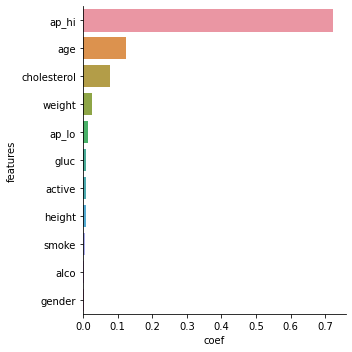

In [ ]:
feature_importance = pd.DataFrame({"features": df.columns[:-1], "coef": grid.best_estimator_.feature_importances_}).sort_values(by="coef", ascending=False)
_=sns.catplot(x="coef",y="features", data=feature_importance, kind="bar" )

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

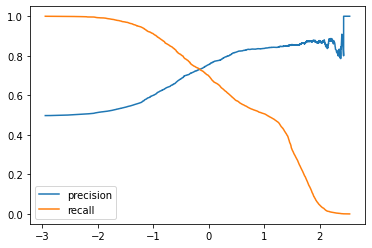

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
print("accuracy score : ", accuracy_score(y_test, y_pred))
print("recall score : ", recall_score(y_test, y_pred))

accuracy score :  0.6535674021581576
recall score :  0.9103124494090983


#**4. WebApp : Flask**

#Goal : to extend the application to a web based platform using Flask package

In [ ]:
# Saving model to the disk
import pickle
pickle.dump(grid.best_estimator_, open("model.pkl", "wb"))